In [55]:
import pandas as pd 
import datetime
from dateutil.relativedelta import  relativedelta
import numpy as np

In [56]:
# Read the sheets from the data files:
plants= pd.read_excel("Data.xlsx",0)
flight_dates= pd.read_excel("Data.xlsx", 1)
planting= pd.read_excel("Data.xlsx",2)
weather= pd.read_excel("Data.xlsx",3)

In [57]:
# Rename the columns and delete the spaces from the column names:
for df in [plants, flight_dates,planting, weather]:
    df.columns = df.columns.str.replace(' ','_')
    
weather.rename(columns={weather.columns[0]: 'Date'},inplace=True)
planting.rename(columns={"Planting_Batch":"Batch_Number"},inplace=True)

In [58]:
# Drop any row with 'Remove' column has a value:
plants = plants[plants['Remove'].isna()]

# Drop the not used columns in features:
plants.drop(['Diameter_Ratio', 'Density_(kg/L)', 'Remove'], axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [59]:
# Print columns for each sheet:
sheets = ['Plants', 'Flight Dates', 'Planting', 'Weather']
for i, j in enumerate([plants, flight_dates, planting, weather]):
    print('*****', sheets[i], '*****')
    print(j.columns.tolist())
    print()

***** Plants *****
['Batch_Number', 'Plant_Date', 'Class', 'Fresh_Weight_(g)', 'Head_Weight_(g)', 'Radial_Diameter_(mm)', 'Polar_Diameter_(mm)', 'Leaves', 'Leaf_Area_(cm^2)', 'Square_ID', 'Check_Date', 'Flight_Date']

***** Flight Dates *****
['Batch_Number', 'Flight_Date']

***** Planting *****
['Crop', 'Column2', 'Column3', 'Plant_Date', 'Column1', 'Region', 'Column4', 'Batch_Number', 'Volume_Planted', 'Planting_Wk']

***** Weather *****
['Date', 'Solar_Radiation_[avg]', 'Precipitation_[sum]', 'Wind_Speed_[avg]', 'Wind_Speed_[max]', 'Battery_Voltage_[last]', 'Leaf_Wetness_[time]', 'Air_Temperature_[avg]', 'Air_Temperature_[max]', 'Air_Temperature_[min]', 'Relative_Humidity_[avg]', 'Dew_Point_[avg]', 'Dew_Point_[min]', 'ET0_[result]']



In [60]:
# Describe each sheet:
for i, j in enumerate([plants, flight_dates, planting, weather]):
    print('*****', sheets[i], '*****')
    print(j.describe())
    print()

***** Plants *****
       Batch_Number        Class  ...  Leaf_Area_(cm^2)    Square_ID
count   4789.000000  4789.000000  ...       4787.000000  4789.000000
mean     622.812696     2.970558  ...        497.792772   398.233034
std       92.948267     1.424723  ...        211.967256   410.501347
min      402.000000     1.000000  ...         67.000000     4.000000
25%      582.000000     2.000000  ...        340.000000    94.000000
50%      647.000000     3.000000  ...        474.000000   247.000000
75%      698.000000     4.000000  ...        621.000000   529.000000
max      739.000000     5.000000  ...       1305.000000  2019.000000

[8 rows x 9 columns]

***** Flight Dates *****
       Batch_Number
count     50.000000
mean     560.320000
std       80.049077
min      402.000000
25%      477.250000
50%      586.500000
75%      621.750000
max      693.000000

***** Planting *****
              Crop  Column2  Column3  ...  Batch_Number  Volume_Planted  Planting_Wk
count  1821.000000      0

In [61]:
# Find Nulls columns percentage:
for i, j in enumerate([plants, flight_dates, planting, weather]):
    print('*****', sheets[i], '*****')
    print(round(j.isna().sum()/j.shape[0]*100))
    print()

***** Plants *****
Batch_Number             0.0
Plant_Date               4.0
Class                    0.0
Fresh_Weight_(g)         0.0
Head_Weight_(g)          2.0
Radial_Diameter_(mm)     2.0
Polar_Diameter_(mm)      2.0
Leaves                  98.0
Leaf_Area_(cm^2)         0.0
Square_ID                0.0
Check_Date               0.0
Flight_Date             90.0
dtype: float64

***** Flight Dates *****
Batch_Number    0.0
Flight_Date     0.0
dtype: float64

***** Planting *****
Crop                0.0
Column2           100.0
Column3           100.0
Plant_Date          0.0
Column1           100.0
Region              0.0
Column4           100.0
Batch_Number        0.0
Volume_Planted      0.0
Planting_Wk         0.0
dtype: float64

***** Weather *****
Date                       0.0
Solar_Radiation_[avg]      0.0
Precipitation_[sum]        0.0
Wind_Speed_[avg]           0.0
Wind_Speed_[max]           0.0
Battery_Voltage_[last]     0.0
Leaf_Wetness_[time]        0.0
Air_Temperature_[avg] 

In [62]:
# Drop columns that have more than 95% nulls:
for i, j in enumerate([plants, flight_dates, planting, weather]):
    print('*****', sheets[i], '*****')
    per = round(j.isna().sum()/j.shape[0]*100)
    drop_cols = per[per >= 95].index.tolist()
    j.drop(drop_cols, axis=1, inplace=True)
    print(drop_cols)
    print()

***** Plants *****
['Leaves']

***** Flight Dates *****
[]

***** Planting *****
['Column2', 'Column3', 'Column1', 'Column4']

***** Weather *****
[]



In [63]:
# Merge the plants and planting sheets together, based on the Batch Number:
plants = plants.merge(planting, on=['Batch_Number', 'Plant_Date'], how='left')

In [64]:
# Find the Batches that don't have a Plant Date:
plants[plants['Plant_Date'].isna()]['Batch_Number'].unique()

array([691, 693, 694, 695, 699, 698])

In [65]:
# Find the number of missing Flight Dates:
print('Total Number:',plants.shape[0])
print('Missing Flight Dates:', plants['Flight_Date'].isna().sum())

Total Number: 4789
Missing Flight Dates: 4321


In [66]:
# Get the missing Flight Dates from flight_date sheet:
plants = plants.merge(flight_dates, on='Batch_Number', how='left')
plants['Flight_Date']=plants.Flight_Date_x.combine_first(plants.Flight_Date_y)
plants.drop(columns=['Flight_Date_x','Flight_Date_y'], inplace=True)

In [67]:
# Find the number of missing Flight Dates:
print('Total Number:',plants.shape[0])
print('Missing Flight Dates:', plants['Flight_Date'].isna().sum())

Total Number: 4789
Missing Flight Dates: 1455


In [68]:
plants.columns

Index(['Batch_Number', 'Plant_Date', 'Class', 'Fresh_Weight_(g)',
       'Head_Weight_(g)', 'Radial_Diameter_(mm)', 'Polar_Diameter_(mm)',
       'Leaf_Area_(cm^2)', 'Square_ID', 'Check_Date', 'Crop', 'Region',
       'Volume_Planted', 'Planting_Wk', 'Flight_Date'],
      dtype='object')

In [69]:
plants['Check_Date']=pd.to_datetime(plants['Check_Date'])
plants['Flight_Date']=pd.to_datetime(plants['Flight_Date'])
plants['Plant_Date']=pd.to_datetime(plants['Plant_Date'])


In [70]:
# Create two new features based on days between plant date and flight date/check date
plants['days_to_flight_check'] =(plants['Flight_Date'] - plants['Plant_Date'])/np.timedelta64(1,'D')
plants['days_to_manual_check'] =(plants['Check_Date'] - plants['Plant_Date'])/np.timedelta64(1,'D')


In [71]:
plants

,Batch_Number,Plant_Date,Class,Fresh_Weight_(g),Head_Weight_(g),Radial_Diameter_(mm),Polar_Diameter_(mm),Leaf_Area_(cm^2),Square_ID,Check_Date,Crop,Region,Volume_Planted,Planting_Wk,Flight_Date,days_to_flight_check,days_to_manual_check
0,402,2020-04-11,3,15.0,NaN,NaN,NaN,185.0,208,2020-04-30,3.0,0.0,155232.0,15.0,2020-04-30,19.0,19.0
1,402,2020-04-11,4,15.0,NaN,NaN,NaN,156.0,208,2020-04-30,3.0,0.0,155232.0,15.0,2020-04-30,19.0,19.0
2,402,2020-04-11,1,16.0,NaN,NaN,NaN,137.0,208,2020-04-30,3.0,0.0,155232.0,15.0,2020-04-30,19.0,19.0
3,402,2020-04-11,3,15.0,NaN,NaN,NaN,225.0,208,2020-04-30,3.0,0.0,155232.0,15.0,2020-04-30,19.0,19.0
4,402,2020-04-11,3,15.0,NaN,NaN,NaN,157.0,208,2020-04-30,3.0,0.0,155232.0,15.0,2020-04-30,19.0,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4784,738,2020-08-27,4,284.0,12.0,50.0,55.0,430.0,1172,2020-10-20,3.0,0.0,265608.0,35.0,NaT,NaN,54.0
4785,738,2020-08-27,5,199.0,8.0,45.0,85.0,358.0,1172,2020-10-20,3.0,0.0,265608.0,35.0,NaT,NaN,54.0
4786,738,2020-08-27,3,280.0,23.0,60.0,80.0,417.0,1172,2020-10-20,3.0,0.0,265608.0,35.0,NaT,NaN,54.0
4787,738,2020-08-27,4,247.0,10.0,45.0,80.0,413.0,1172,2020-10-20,3.0,0.0,265608.0,35.0,NaT,NaN,54.0


In [72]:
plants['Last_Year']= plants["Flight_Date"] - pd.Timedelta(days=366) 


In [73]:
plants=plants.merge(weather, left_on='Last_Year', right_on='Date', how='left')


In [74]:
plants=plants.merge(weather, left_on='Flight_Date', right_on='Date', how='left')


In [75]:
plants.columns = plants.columns.str.replace('_x','_Last_Year')
plants.columns = plants.columns.str.replace('_y','_Flight_Year')


In [76]:
plants

,Batch_Number,Plant_Date,Class,Fresh_Weight_(g),Head_Weight_(g),Radial_Diameter_(mm),Polar_Diameter_(mm),Leaf_Area_(cm^2),Square_ID,Check_Date,Crop,Region,Volume_Planted,Planting_Wk,Flight_Date,days_to_flight_check,days_to_manual_check,Last_Year,Date_Last_Year,Solar_Radiation_[avg]_Last_Year,Precipitation_[sum]_Last_Year,Wind_Speed_[avg]_Last_Year,Wind_Speed_[max]_Last_Year,Battery_Voltage_[last]_Last_Year,Leaf_Wetness_[time]_Last_Year,Air_Temperature_[avg]_Last_Year,Air_Temperature_[max]_Last_Year,Air_Temperature_[min]_Last_Year,Relative_Humidity_[avg]_Last_Year,Dew_Point_[avg]_Last_Year,Dew_Point_[min]_Last_Year,ET0_[result]_Last_Year,Date_Flight_Year,Solar_Radiation_[avg]_Flight_Year,Precipitation_[sum]_Flight_Year,Wind_Speed_[avg]_Flight_Year,Wind_Speed_[max]_Flight_Year,Battery_Voltage_[last]_Flight_Year,Leaf_Wetness_[time]_Flight_Year,Air_Temperature_[avg]_Flight_Year,Air_Temperature_[max]_Flight_Year,Air_Temperature_[min]_Flight_Year,Relative_Humidity_[avg]_Flight_Year,Dew_Point_[avg]_Flight_Year,Dew_Point_[min]_Flight_Year,ET0_[result]_Flight_Year
0,402,2020-04-11,3,15.0,NaN,NaN,NaN,185.0,208,2020-04-30,3.0,0.0,155232.0,15.0,2020-04-30,19.0,19.0,2019-04-30,2019-04-30,156.0,0.0,0.4,2.2,6718.0,0.0,8.07,15.36,0.35,88.0,5.7,0.2,1.9,2020-04-30,159.0,3.4,3.9,7.4,6894.0,20.0,9.24,13.07,6.03,89.02,7.3,5.7,1.9
1,402,2020-04-11,4,15.0,NaN,NaN,NaN,156.0,208,2020-04-30,3.0,0.0,155232.0,15.0,2020-04-30,19.0,19.0,2019-04-30,2019-04-30,156.0,0.0,0.4,2.2,6718.0,0.0,8.07,15.36,0.35,88.0,5.7,0.2,1.9,2020-04-30,159.0,3.4,3.9,7.4,6894.0,20.0,9.24,13.07,6.03,89.02,7.3,5.7,1.9
2,402,2020-04-11,1,16.0,NaN,NaN,NaN,137.0,208,2020-04-30,3.0,0.0,155232.0,15.0,2020-04-30,19.0,19.0,2019-04-30,2019-04-30,156.0,0.0,0.4,2.2,6718.0,0.0,8.07,15.36,0.35,88.0,5.7,0.2,1.9,2020-04-30,159.0,3.4,3.9,7.4,6894.0,20.0,9.24,13.07,6.03,89.02,7.3,5.7,1.9
3,402,2020-04-11,3,15.0,NaN,NaN,NaN,225.0,208,2020-04-30,3.0,0.0,155232.0,15.0,2020-04-30,19.0,19.0,2019-04-30,2019-04-30,156.0,0.0,0.4,2.2,6718.0,0.0,8.07,15.36,0.35,88.0,5.7,0.2,1.9,2020-04-30,159.0,3.4,3.9,7.4,6894.0,20.0,9.24,13.07,6.03,89.02,7.3,5.7,1.9
4,402,2020-04-11,3,15.0,NaN,NaN,NaN,157.0,208,2020-04-30,3.0,0.0,155232.0,15.0,2020-04-30,19.0,19.0,2019-04-30,2019-04-30,156.0,0.0,0.4,2.2,6718.0,0.0,8.07,15.36,0.35,88.0,5.7,0.2,1.9,2020-04-30,159.0,3.4,3.9,7.4,6894.0,20.0,9.24,13.07,6.03,89.02,7.3,5.7,1.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4784,738,2020-08-27,4,284.0,12.0,50.0,55.0,430.0,1172,2020-10-20,3.0,0.0,265608.0,35.0,NaT,NaN,54.0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4785,738,2020-08-27,5,199.0,8.0,45.0,85.0,358.0,1172,2020-10-20,3.0,0.0,265608.0,35.0,NaT,NaN,54.0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4786,738,2020-08-27,3,280.0,23.0,60.0,80.0,417.0,1172,2020-10-20,3.0,0.0,265608.0,35.0,NaT,NaN,54.0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4787,738,2020-08-27,4,247.0,10.0,45.0,80.0,413.0,1172,2020-10-20,3.0,0.0,265608.0,35.0,NaT,NaN,54.0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [77]:
# Delete records with null flight time, planet date:
plants[['Flight_Date', 'Plant_Date', 'Radial_Diameter_(mm)', 'Polar_Diameter_(mm)', 'Head_Weight_(g)']].dropna(inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [78]:
# Fill nulls with average:
plants.fillna(plants.mean(), inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  


In [79]:
# FInal Dataframe
X = plants.drop(['Radial_Diameter_(mm)', 'Polar_Diameter_(mm)', 'Head_Weight_(g)'], axis=1)
y = plants[['Radial_Diameter_(mm)', 'Polar_Diameter_(mm)', 'Head_Weight_(g)']]

In [80]:
X

,Batch_Number,Plant_Date,Class,Fresh_Weight_(g),Leaf_Area_(cm^2),Square_ID,Check_Date,Crop,Region,Volume_Planted,Planting_Wk,Flight_Date,days_to_flight_check,days_to_manual_check,Last_Year,Date_Last_Year,Solar_Radiation_[avg]_Last_Year,Precipitation_[sum]_Last_Year,Wind_Speed_[avg]_Last_Year,Wind_Speed_[max]_Last_Year,Battery_Voltage_[last]_Last_Year,Leaf_Wetness_[time]_Last_Year,Air_Temperature_[avg]_Last_Year,Air_Temperature_[max]_Last_Year,Air_Temperature_[min]_Last_Year,Relative_Humidity_[avg]_Last_Year,Dew_Point_[avg]_Last_Year,Dew_Point_[min]_Last_Year,ET0_[result]_Last_Year,Date_Flight_Year,Solar_Radiation_[avg]_Flight_Year,Precipitation_[sum]_Flight_Year,Wind_Speed_[avg]_Flight_Year,Wind_Speed_[max]_Flight_Year,Battery_Voltage_[last]_Flight_Year,Leaf_Wetness_[time]_Flight_Year,Air_Temperature_[avg]_Flight_Year,Air_Temperature_[max]_Flight_Year,Air_Temperature_[min]_Flight_Year,Relative_Humidity_[avg]_Flight_Year,Dew_Point_[avg]_Flight_Year,Dew_Point_[min]_Flight_Year,ET0_[result]_Flight_Year
0,402,2020-04-11,3,15.0,185.0,208,2020-04-30,3.0,0.0,155232.0,15.0,2020-04-30,19.000000,19.0,2019-04-30,2019-04-30,156.000000,0.000000,0.400000,2.200000,6718.000000,0.000000,8.070000,15.360000,0.350000,88.000000,5.700000,0.200000,1.900000,2020-04-30,159.000000,3.400000,3.90000,7.400000,6894.000000,20.000000,9.240000,13.070000,6.030000,89.02000,7.300000,5.700000,1.900000
1,402,2020-04-11,4,15.0,156.0,208,2020-04-30,3.0,0.0,155232.0,15.0,2020-04-30,19.000000,19.0,2019-04-30,2019-04-30,156.000000,0.000000,0.400000,2.200000,6718.000000,0.000000,8.070000,15.360000,0.350000,88.000000,5.700000,0.200000,1.900000,2020-04-30,159.000000,3.400000,3.90000,7.400000,6894.000000,20.000000,9.240000,13.070000,6.030000,89.02000,7.300000,5.700000,1.900000
2,402,2020-04-11,1,16.0,137.0,208,2020-04-30,3.0,0.0,155232.0,15.0,2020-04-30,19.000000,19.0,2019-04-30,2019-04-30,156.000000,0.000000,0.400000,2.200000,6718.000000,0.000000,8.070000,15.360000,0.350000,88.000000,5.700000,0.200000,1.900000,2020-04-30,159.000000,3.400000,3.90000,7.400000,6894.000000,20.000000,9.240000,13.070000,6.030000,89.02000,7.300000,5.700000,1.900000
3,402,2020-04-11,3,15.0,225.0,208,2020-04-30,3.0,0.0,155232.0,15.0,2020-04-30,19.000000,19.0,2019-04-30,2019-04-30,156.000000,0.000000,0.400000,2.200000,6718.000000,0.000000,8.070000,15.360000,0.350000,88.000000,5.700000,0.200000,1.900000,2020-04-30,159.000000,3.400000,3.90000,7.400000,6894.000000,20.000000,9.240000,13.070000,6.030000,89.02000,7.300000,5.700000,1.900000
4,402,2020-04-11,3,15.0,157.0,208,2020-04-30,3.0,0.0,155232.0,15.0,2020-04-30,19.000000,19.0,2019-04-30,2019-04-30,156.000000,0.000000,0.400000,2.200000,6718.000000,0.000000,8.070000,15.360000,0.350000,88.000000,5.700000,0.200000,1.900000,2020-04-30,159.000000,3.400000,3.90000,7.400000,6894.000000,20.000000,9.240000,13.070000,6.030000,89.02000,7.300000,5.700000,1.900000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4784,738,2020-08-27,4,284.0,430.0,1172,2020-10-20,3.0,0.0,265608.0,35.0,NaT,31.958409,54.0,NaT,NaT,146.526395,0.835213,1.687283,4.397211,6749.981404,86.216257,16.184316,22.398659,9.558665,80.715942,11.921446,7.976245,2.674055,NaT,208.584283,2.017397,2.40108,5.365927,6870.430114,56.840132,16.486854,21.849157,10.600006,81.48482,12.577445,9.240852,3.345141
4785,738,2020-08-27,5,199.0,358.0,1172,2020-10-20,3.0,0.0,265608.0,35.0,NaT,31.958409,54.0,NaT,NaT,146.526395,0.835213,1.687283,4.397211,6749.981404,86.216257,16.184316,22.398659,9.558665,80.715942,11.921446,7.976245,2.674055,NaT,208.584283,2.017397,2.40108,5.365927,6870.430114,56.840132,16.486854,21.849157,10.600006,81.48482,12.577445,9.240852,3.345141
4786,738,2020-08-27,3,280.0,417.0,1172,2020-10-20,3.0,0.0,265608.0,35.0,NaT,31.958409,54.0,NaT,NaT,146.526395,0.835213,1.687283,4.397211,6749.981404,86.216257,16.184316,22.398659,9.558665,80.715942,11.921446,7.976245,2.674055,NaT,20

In [81]:
y

,Radial_Diameter_(mm),Polar_Diameter_(mm),Head_Weight_(g)
0,100.161187,97.231853,182.992955
1,100.161187,97.231853,182.992955
2,100.161187,97.231853,182.992955
3,100.161187,97.231853,182.992955
4,100.161187,97.231853,182.992955
...,...,...,...
4784,50.000000,55.000000,12.000000
4785,45.000000,85.000000,8.000000
4786,60.000000,80.000000,23.000000
4787,45.000000,80.000000,10.000000


In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Fresh Weight [g] Vs Head_Weight [g]')

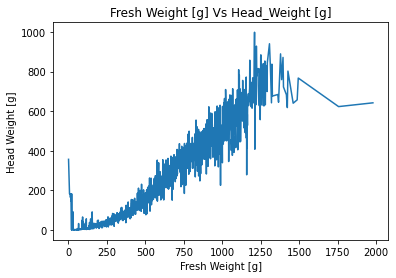

In [83]:
sns.lineplot(x=X['Fresh_Weight_(g)'], y=y['Head_Weight_(g)'], ci=None)
plt.xlabel('Fresh Weight [g]')
plt.ylabel('Head Weight [g]')
plt.title('Fresh Weight [g] Vs Head_Weight [g]')

Text(0.5, 1.0, 'Leaf Area [cm^2] Vs Polar Diameter [mm]')

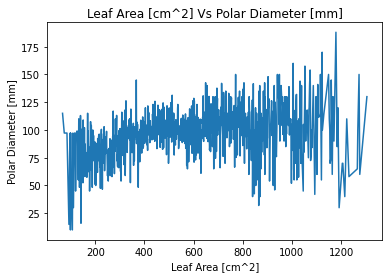

In [84]:
sns.lineplot(x=X['Leaf_Area_(cm^2)'], y=y['Polar_Diameter_(mm)'], ci=None)
plt.xlabel('Leaf Area [cm^2]')
plt.ylabel('Polar Diameter [mm]')
plt.title('Leaf Area [cm^2] Vs Polar Diameter [mm]')

Text(0.5, 1.0, 'Leaf Area [cm^2] Vs Polar Diameter [mm]')

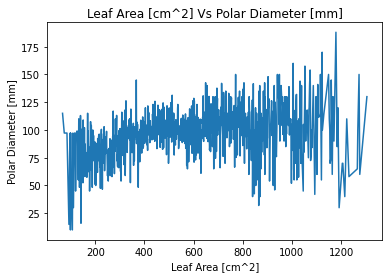

In [85]:
sns.lineplot(x=X['Leaf_Area_(cm^2)'], y=y['Polar_Diameter_(mm)'], ci=None)
plt.xlabel('Leaf Area [cm^2]')
plt.ylabel('Polar Diameter [mm]')
plt.title('Leaf Area [cm^2] Vs Polar Diameter [mm]')

Text(0.5, 1.0, 'Planting Wk')

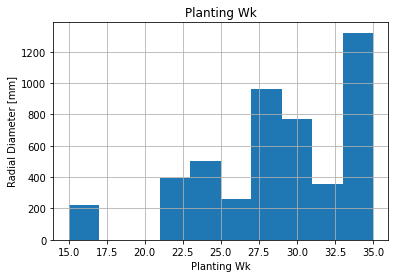

In [86]:
X['Planting_Wk'].hist()
plt.xlabel('Planting Wk')
plt.ylabel('Radial Diameter [mm]')
plt.title('Planting Wk')

Text(0.5, 1.0, 'Class')

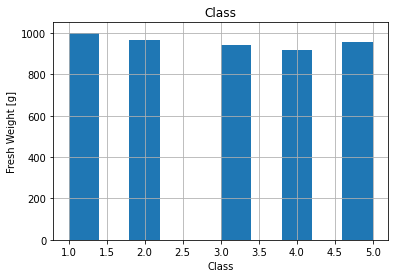

In [87]:
X['Class'].hist()
plt.xlabel('Class')
plt.ylabel('Fresh Weight [g]')
plt.title('Class')

In [88]:
X.columns

Index(['Batch_Number', 'Plant_Date', 'Class', 'Fresh_Weight_(g)',
       'Leaf_Area_(cm^2)', 'Square_ID', 'Check_Date', 'Crop', 'Region',
       'Volume_Planted', 'Planting_Wk', 'Flight_Date', 'days_to_flight_check',
       'days_to_manual_check', 'Last_Year', 'Date_Last_Year',
       'Solar_Radiation_[avg]_Last_Year', 'Precipitation_[sum]_Last_Year',
       'Wind_Speed_[avg]_Last_Year', 'Wind_Speed_[max]_Last_Year',
       'Battery_Voltage_[last]_Last_Year', 'Leaf_Wetness_[time]_Last_Year',
       'Air_Temperature_[avg]_Last_Year', 'Air_Temperature_[max]_Last_Year',
       'Air_Temperature_[min]_Last_Year', 'Relative_Humidity_[avg]_Last_Year',
       'Dew_Point_[avg]_Last_Year', 'Dew_Point_[min]_Last_Year',
       'ET0_[result]_Last_Year', 'Date_Flight_Year',
       'Solar_Radiation_[avg]_Flight_Year', 'Precipitation_[sum]_Flight_Year',
       'Wind_Speed_[avg]_Flight_Year', 'Wind_Speed_[max]_Flight_Year',
       'Battery_Voltage_[last]_Flight_Year', 'Leaf_Wetness_[time]_Flight_Year',

In [89]:
y

,Radial_Diameter_(mm),Polar_Diameter_(mm),Head_Weight_(g)
0,100.161187,97.231853,182.992955
1,100.161187,97.231853,182.992955
2,100.161187,97.231853,182.992955
3,100.161187,97.231853,182.992955
4,100.161187,97.231853,182.992955
...,...,...,...
4784,50.000000,55.000000,12.000000
4785,45.000000,85.000000,8.000000
4786,60.000000,80.000000,23.000000
4787,45.000000,80.000000,10.000000
